<a href="https://colab.research.google.com/github/OzgeElibol/COMP1832/blob/main/Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


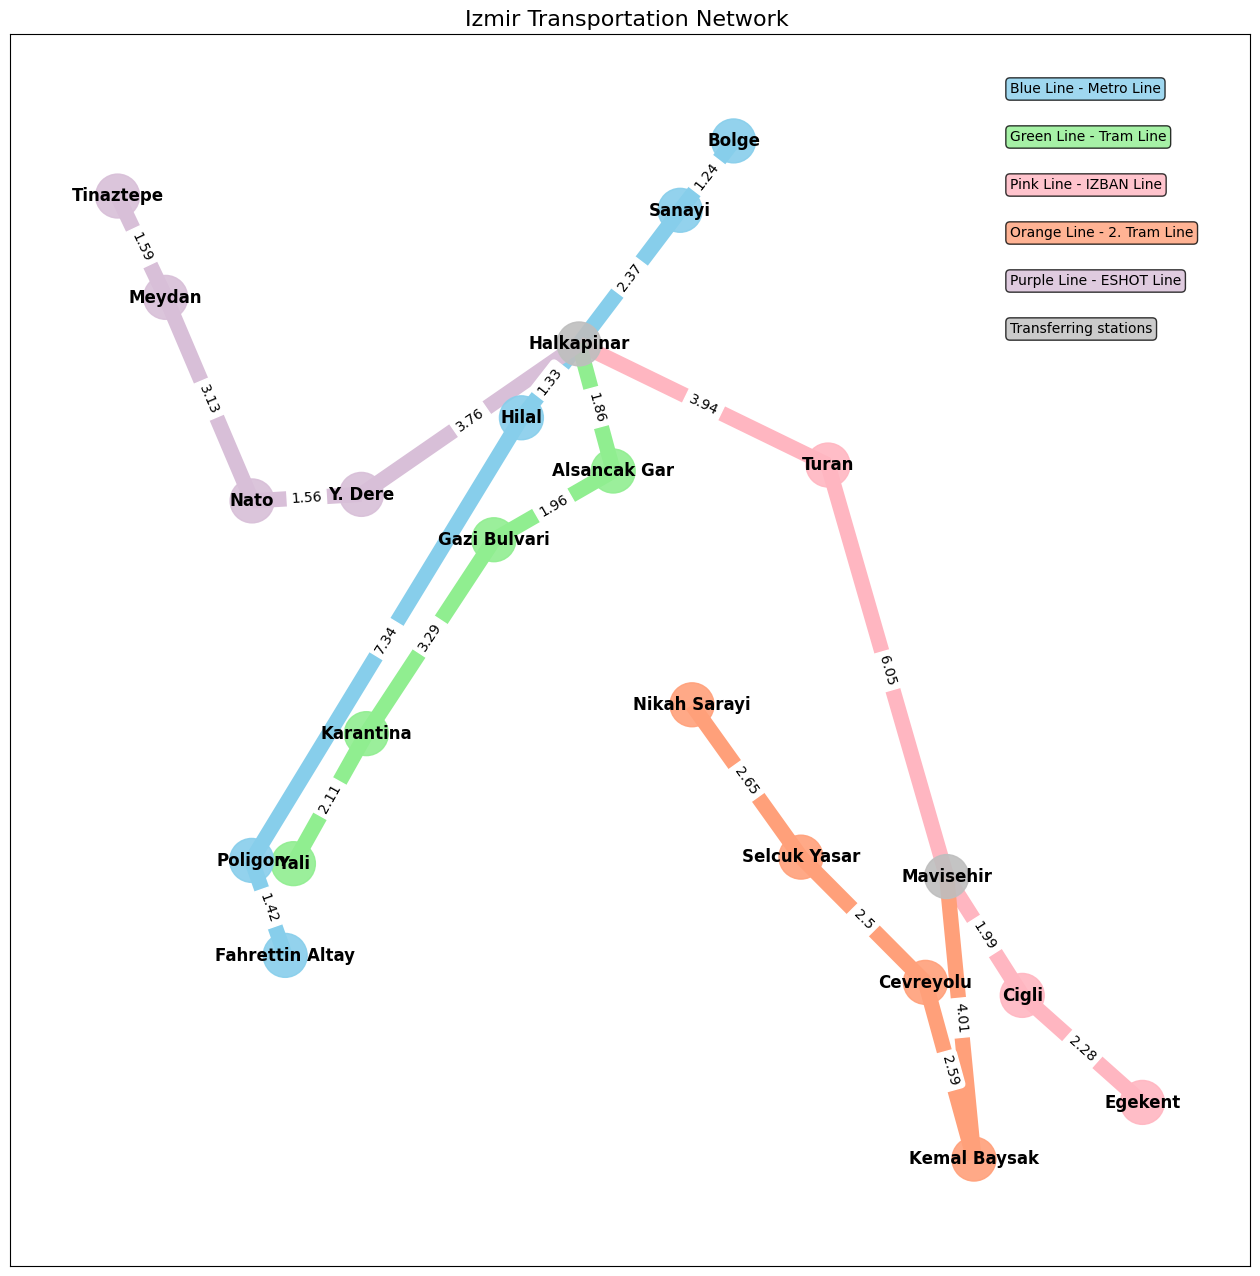

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import geopy.distance

# Coordinates & names for each station in the map,consisting of minimum 5 edges and 5 nodes in each line
coordinates = {
    "Fahrettin Altay": (38 + 23 / 60 + 50.7 / 3600, 27 + 4 / 60 + 11.6 / 3600),
    "Hilal": (38 + 25 / 60 + 39.8 / 3600, 27 + 9 / 60 + 24.6 / 3600),
    "Halkapinar": (38 + 26 / 60 + 6.4 / 3600, 27 + 10 / 60 + 7.6 / 3600),
    "Sanayi": (38 + 26 / 60 + 53.1 / 3600, 27 + 11 / 60 + 25.4 / 3600),
    "Bolge": (38 + 27 / 60 + 17.8 / 3600, 27 + 12 / 60 + 5.8 / 3600),
    "Egekent": (38 + 30 / 60 + 26.6 / 3600, 27 + 2 / 60 + 46.0 / 3600),
    "Mavisehir": (38 + 28 / 60 + 56.2 / 3600, 27 + 4 / 60 + 57.5 / 3600),
    "Cigli": (38 + 29 / 60 + 31.1 / 3600, 27 + 3 / 60 + 48.3 / 3600),
    "Turan": (38 + 28 / 60 + 1.4 / 3600, 27 + 8 / 60 + 57.1 / 3600),
    "Alsancak Gar": (38 + 26 / 60 + 22.2 / 3600, 27 + 8 / 60 + 53.6 / 3600),
    "Gazi Bulvari": (38 + 25 / 60 + 27.1 / 3600, 27 + 8 / 60 + 13.6 / 3600),
    "Karantina": (38 + 24 / 60 + 28.2 / 3600, 27 + 6 / 60 + 20.7 / 3600),
    "Yali": (38 + 23 / 60 + 54.5 / 3600, 27 + 5 / 60 + 5.0 / 3600),
    "Kemal Baysak": (38 + 29 / 60 + 8.8 / 3600, 27 + 2 / 60 + 13.0 / 3600),
    "Cevreyolu": (38 + 28 / 60 + 46.4 / 3600, 27 + 3 / 60 + 55.9 / 3600),
    "Selcuk Yasar": (38 + 27 / 60 + 48.9 / 3600, 27 + 5 / 60 + 8.8 / 3600),
    "Nikah Sarayi": (38 + 26 / 60 + 58.6 / 3600, 27 + 6 / 60 + 37.5 / 3600),
    "Poligon": (38 + 23 / 60 + 35.2 / 3600, 27 + 5 / 60 + 6.9 / 3600),
    "Y. Dere": (38 + 24 / 60 + 25.9 / 3600, 27 + 8 / 60 + 40.0 / 3600),
    "Nato": (38 + 23 / 60 + 35.4 / 3600, 27 + 8 / 60 + 36.2 / 3600),
    "Meydan": (38 + 22 / 60 + 55.5 / 3600, 27 + 10 / 60 + 34.7 / 3600),
    "Tinaztepe": (38 + 22 / 60 + 33.3 / 3600, 27 + 11 / 60 + 33.7 / 3600),
}

# Defining reference point to Halkapinar for positioning other nodes
reference_point = coordinates["Halkapinar"]

#Q1 Calculating the positions of the other nodes relative to the reference point
npos = {
    station: (
        geopy.distance.geodesic(reference_point, (lat, reference_point[1])).km *
        (1 if lat >= reference_point[0] else -1),
        geopy.distance.geodesic(reference_point, (reference_point[0], lon)).km *
        (1 if lon >= reference_point[1] else -1)
    )
    for station, (lat, lon) in coordinates.items()
}

# A function to calculate distances between neighbouring stations
def calculate_distance(node1, node2):
    return round(geopy.distance.geodesic(coordinates[node1], coordinates[node2]).km, 2)

# Assigning different colours for nodes to show different lines clearly
node_colors = {
    "Halkapinar": "#BEBEBE", "Mavisehir": "#BEBEBE",  # gray for highlighting transfering stations
    "Fahrettin Altay": "#87CEEB", "Poligon": "#87CEEB", "Hilal": "#87CEEB", "Sanayi": "#87CEEB", "Bolge": "#87CEEB", # Blue
    "Yali": "#90EE90", "Karantina": "#90EE90",  "Gazi Bulvari": "#90EE90", "Alsancak Gar": "#90EE90", # Green
    "Egekent": "#FFB6C1", "Cigli": "#FFB6C1", "Turan": "#FFB6C1", # Pink
    "Kemal Baysak": "#FFA07A", "Cevreyolu": "#FFA07A", "Selcuk Yasar": "#FFA07A", "Nikah Sarayi": "#FFA07A",# Orange
    "Y. Dere": "#D8BFD8", "Nato": "#D8BFD8", "Meydan": "#D8BFD8", "Tinaztepe": "#D8BFD8" #purple
}

# Creating the graph & adding nodes
MyGraph = nx.Graph()
for station, position in npos.items():
    MyGraph.add_node(station, npos=position, ccn=node_colors[station])

# Defining the edges and their weights relative to the neighbour node (distances between nodes)
edges = [
    ("Halkapinar", "Hilal"),
    ("Halkapinar", "Sanayi"),
    ("Sanayi", "Bolge"),
    ("Egekent", "Cigli"),
    ("Mavisehir", "Cigli"),
    ("Mavisehir", "Turan"),
    ("Turan", "Halkapinar"),
    ("Halkapinar", "Alsancak Gar"),
    ("Alsancak Gar", "Gazi Bulvari"),
    ("Gazi Bulvari", "Karantina"),
    ("Karantina", "Yali"),
    ("Fahrettin Altay", "Poligon"),
    ("Poligon", "Hilal"),
    ("Mavisehir", "Kemal Baysak"),
    ("Kemal Baysak", "Cevreyolu"),
    ("Cevreyolu", "Selcuk Yasar"),
    ("Selcuk Yasar", "Nikah Sarayi"),
    ("Halkapinar", "Y. Dere"),
    ("Y. Dere", "Nato"),
    ("Nato", "Meydan"),
    ("Meydan", "Tinaztepe"),
    ("Halkapinar", "Turan"),
]

# Adding the edges with weights (weights are also used as edge names) and color attributes
# With the defined edges, every station can reach every other station (connected graph in graph theory)
for edge in edges:
    weight = calculate_distance(edge[0], edge[1]) # calculation of distane
    edge_color = node_colors[edge[1]] # defining (different) edge colour
    MyGraph.add_edge(edge[0], edge[1], weight=weight, cce=edge_color)



# Visualization of the map
pos = nx.get_node_attributes(MyGraph, "npos")
weights = nx.get_edge_attributes(MyGraph, "weight")
node_color_list = [MyGraph.nodes[node]["ccn"] for node in MyGraph.nodes]
edge_color_list = [MyGraph.edges[edge]["cce"] for edge in MyGraph.edges]

plt.figure(figsize=(16, 16))


# Drawing nodes & edges
nx.draw_networkx_nodes(MyGraph, pos, node_size=1000, node_color=node_color_list, alpha=0.9)
nx.draw_networkx_edges(MyGraph, pos, edge_color=edge_color_list, width=11)





# Drawing labels for nodes and edges
nx.draw_networkx_labels(MyGraph, pos, font_size=12, font_color="black", font_weight="bold")
nx.draw_networkx_edge_labels(
    MyGraph,
    pos,
    edge_labels=weights
)

# Title to the map
plt.title("Izmir Transportation Network ", fontsize=16)


# A legend to explain the line types
legend_texts = [
    "Blue Line - Metro Line",
    "Green Line - Tram Line",
    "Pink Line - IZBAN Line",
    "Orange Line - 2. Tram Line",
    "Purple Line - ESHOT Line",
    "Transferring stations"
]

legend_colors = ["#87CEEB", "#90EE90", "#FFB6C1", "#FFA07A", "#D8BFD8", "#BEBEBE"]
for i, text in enumerate(legend_texts):
    plt.gcf().text(
        0.75, 0.85 - i * 0.03, text, fontsize=10, va='top', ha='left',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=legend_colors[i], alpha=0.8)
    )